In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
# Check Null Values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#EDA

<AxesSubplot:>

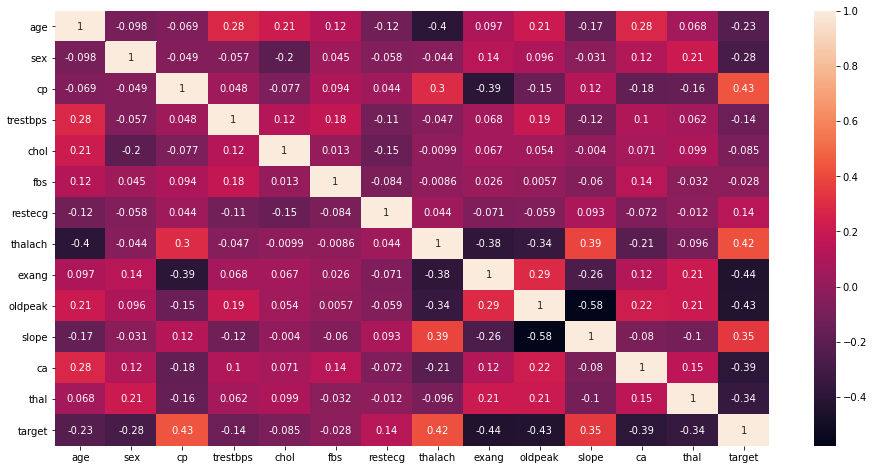

In [8]:
#plt.figure(figsize=(width,height))
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
x=df.drop('target',axis=1)
y=df['target']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30)

In [13]:
logit = LogisticRegression()

In [14]:
logit.fit(x_train,y_train)

C:\Users\Rakesh Verma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
pred = logit.predict(x_test)


In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(pred,y_test)

0.7912087912087912

In [18]:
# Apply Confusion Matrix:

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(pred,y_test)

array([[27,  8],
       [11, 45]], dtype=int64)

In [21]:
cm = pd.DataFrame(confusion_matrix(pred,y_test),index = ['prediction 1','prediction 0'], columns = ['Actual 1','Actual 0'])

In [22]:
cm

,Actual 1,Actual 0
prediction 1,27,8
prediction 0,11,45


<AxesSubplot:>

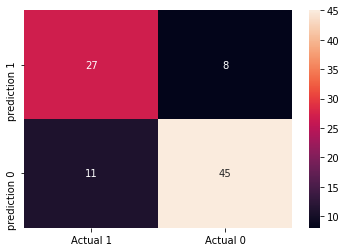

In [23]:
sns.heatmap(cm,annot=True)

In [24]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

           0       0.71      0.77      0.74        35
           1       0.85      0.80      0.83        56

    accuracy                           0.79        91
   macro avg       0.78      0.79      0.78        91
weighted avg       0.80      0.79      0.79        91

